In [2]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv
/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv


## Importing Libraries

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import re                           # re is used for regular expression in python i.e Regex
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import nltk                         # natural language tool kit
from nltk.corpus import stopwords   # for stop words
from sklearn.feature_extraction.text import CountVectorizer    # used for bag of words
from sklearn.feature_extraction.text import TfidfTransformer  # tfidf --> term frequency 
                                                              # inverse document frequency
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer     # this is imported for using lemmatizing, it is
                                            # used for converting the word in its base form
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**converting training file into data frame**

In [4]:
train_df = pd.read_csv("/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv",
                       encoding='latin-1') # used latin-1 encoding instead of utf8 for 
                                           # type of format

In [5]:
train_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


**counting the no. of tweets for perticular category**

In [6]:
train_df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

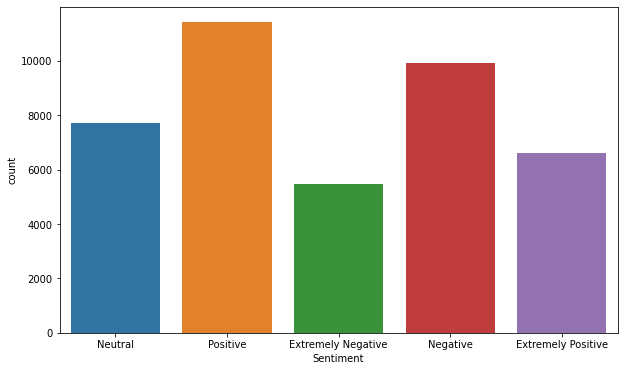

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x=train_df['Sentiment'])

From above graph we can say that our data is not well balanced

**Reducing the labels**

In [8]:
def label_reduce(lbl):
    if lbl == 'Extremely Positive':
        return 'Positive'
    elif lbl == 'Extremely Negative':
        return 'Negative'
    else:
        return lbl

In [9]:
train_df["Sentiment"] = train_df["Sentiment"].apply(label_reduce)

In [10]:
train_df['Sentiment'].value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

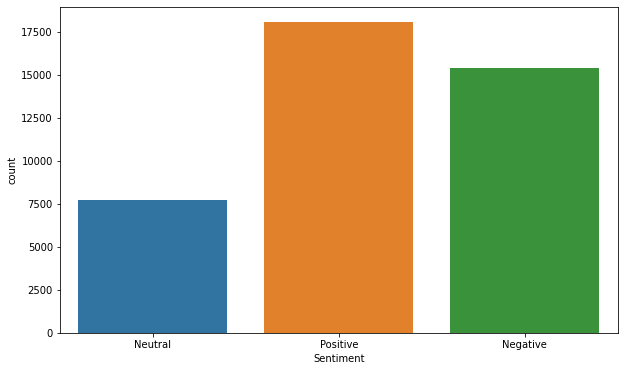

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x=train_df['Sentiment'])

By reducing labels our data set becomes more imbalanced

**creating functions for clearnig text and prepeared for nlp model**

In [12]:
lm = WordNetLemmatizer()

In [13]:
def text_cleaning(tweet):
    tweet = re.sub(r"\S*https?:\S*", "", tweet)
    tweet = re.sub('[^a-zA-Z]',' ',tweet)
    tweet = [lm.lemmatize(word.lower()) for word in tweet.split() if word.lower() not in stopwords.words("english")]
    tweet = ' '.join(tweet)
    return tweet

In [14]:
train_df["OriginalTweet"] = train_df["OriginalTweet"].apply(text_cleaning)

In [15]:
train_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,menyrbie phil gahan chrisitv,Neutral
1,3800,48752,UK,16-03-2020,advice talk neighbour family exchange phone nu...,Positive
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworth give elderly d...,Positive
3,3802,48754,NaN,16-03-2020,food stock one empty please panic enough food ...,Positive
4,3803,48755,NaN,16-03-2020,ready go supermarket covid outbreak paranoid f...,Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,airline pilot offering stock supermarket shelf...,Neutral
41153,44952,89904,NaN,14-04-2020,response complaint provided citing covid relat...,Negative
41154,44953,89905,NaN,14-04-2020,know getting tough kameronwilds rationing toil...,Positive
41155,44954,89906,NaN,14-04-2020,wrong smell hand sanitizer starting turn coron...,Neutral


In [16]:
train_df['OriginalTweet'].iloc[221]

'since kid high schooler btw grocery store cashier apparently critical infrastructure employee sudden would nice pay reflected risk covid'

**Label encoding on dependent variables**

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
lbn = LabelEncoder()

In [19]:
train_df["Sentiment"] = lbn.fit_transform(train_df["Sentiment"])

In [20]:
train_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,menyrbie phil gahan chrisitv,1
1,3800,48752,UK,16-03-2020,advice talk neighbour family exchange phone nu...,2
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworth give elderly d...,2
3,3802,48754,NaN,16-03-2020,food stock one empty please panic enough food ...,2
4,3803,48755,NaN,16-03-2020,ready go supermarket covid outbreak paranoid f...,0
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,airline pilot offering stock supermarket shelf...,1
41153,44952,89904,NaN,14-04-2020,response complaint provided citing covid relat...,0
41154,44953,89905,NaN,14-04-2020,know getting tough kameronwilds rationing toil...,2
41155,44954,89906,NaN,14-04-2020,wrong smell hand sanitizer starting turn coron...,1


In [21]:
X = train_df.iloc[:,4].values        # splitting dataset into X and y
y = train_df.iloc[:,-1].values

In [22]:
print(sum(y == 1))
print(sum(y == 0))
print(sum(y == 2))

7713
15398
18046


In [23]:
y

array([1, 2, 2, ..., 2, 1, 0])

**Creating Bag of words model using Countvectorizer**

In [24]:
bow = CountVectorizer()

In [25]:
bow = bow.fit_transform(X)

In [26]:
print(bow.shape)

(41157, 48334)


**Applying term frequency - inverse documnet frequency**

In [27]:
tfidf = TfidfTransformer()

In [28]:
tf_idf = tfidf.fit_transform(bow)

In [29]:
print(tf_idf)

  (0, 32211)	0.4454994196961109
  (0, 26834)	0.5278058440893191
  (0, 16696)	0.5278058440893191
  (0, 7259)	0.49434021578337256
  (1, 41980)	0.16616469311712173
  (1, 41466)	0.1090853955014867
  (1, 38580)	0.09306433143806883
  (1, 38099)	0.15693416488150194
  (1, 37477)	0.15982948974229427
  (1, 35147)	0.18039891822215656
  (1, 32677)	0.22210245587140287
  (1, 32253)	0.34453354531146635
  (1, 30746)	0.12962666672694928
  (1, 30536)	0.09519476962917445
  (1, 29902)	0.3022086605669
  (1, 28928)	0.3949453924316925
  (1, 26611)	0.20848124817956154
  (1, 24764)	0.1517317729515637
  (1, 17799)	0.23443835051413728
  (1, 14798)	0.12971920036429688
  (1, 14391)	0.2103209488289769
  (1, 13643)	0.2003694266103642
  (1, 9717)	0.18166892410490185
  (1, 8600)	0.1551116177116551
  (1, 7008)	0.2056718012772813
  :	:
  (41156, 47572)	0.17850205491836055
  (41156, 47001)	0.3033773979746335
  (41156, 46745)	0.138420891804394
  (41156, 46175)	0.2536538330271061
  (41156, 45400)	0.2043184037770015
  (4115

**Solving Data imbalance problem using SMOTE(Synthetic Minority Over-sampling Technique)**

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
smote_over_sample = SMOTE()
labels = train_df['Sentiment'].tolist() # converting pandas series to list
X, y = smote_over_sample.fit_resample(tf_idf, labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1)   
print('Train_Set_Size:'+str(X_train.shape))
print('Test_Set_Size:'+str(X_test.shape))

Train_Set_Size:(40603, 48334)
Test_Set_Size:(13535, 48334)


In [32]:
zeros = 0
ones = 0
two  = 0
for i in y:
    if i == 0:
        zeros+=1
    if i == 1:
        ones+=1
    if i == 2:
        two+=1
print("0: ",zeros)
print("1: ",ones)
print("2: ",ones)

0:  18046
1:  18046
2:  18046


## using MultinomialNB model

In [33]:
from sklearn.naive_bayes import MultinomialNB

In [34]:
mnb = MultinomialNB()

In [35]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [36]:
pred = mnb.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.66      0.80      0.72      4511
           1       0.88      0.52      0.66      4512
           2       0.64      0.77      0.70      4512

    accuracy                           0.70     13535
   macro avg       0.73      0.70      0.69     13535
weighted avg       0.73      0.70      0.69     13535

[[3590  147  774]
 [ 967 2360 1185]
 [ 864  177 3471]]


## using LogisticRegression Modle

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr = LogisticRegression(max_iter=400)

In [41]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=400)

In [42]:
lr_pred = lr.predict(X_test)

In [43]:
print(classification_report(y_test,lr_pred))
print(confusion_matrix(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      4511
           1       0.79      0.89      0.84      4512
           2       0.84      0.79      0.81      4512

    accuracy                           0.82     13535
   macro avg       0.82      0.82      0.82     13535
weighted avg       0.82      0.82      0.82     13535

[[3566  529  416]
 [ 232 4025  255]
 [ 429  541 3542]]


## using Random forest classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rndm = RandomForestClassifier(n_estimators=600)

In [46]:
rndm.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [47]:
rndm_pred = rndm.predict(X_test)

In [48]:
print(classification_report(y_test,rndm_pred))
print(confusion_matrix(y_test,rndm_pred))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      4511
           1       0.78      0.90      0.84      4512
           2       0.79      0.76      0.78      4512

    accuracy                           0.80     13535
   macro avg       0.80      0.80      0.79     13535
weighted avg       0.80      0.80      0.79     13535

[[3241  610  660]
 [ 163 4078  271]
 [ 535  527 3450]]


**End**